# **Total Over Prediction of Teams**
---

## **Importing libraries and setting up the data repository :**

In [43]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [44]:
df = pd.read_csv('../csv_files/match_summary.csv',index_col=0)
pd.set_option('display.max_columns', None)

The 'match_summary.csv' file has been generated and included in the repository. You can find the code for creating this file in the 'match_summary_csv_creation.ipynb' notebook.

## **Exploratory Data Analysis (EDA)**

In [45]:
df = df.reset_index(drop=True)

In [46]:
df.head(40)

,venue_x,innings,batting_team,bowling_team,total_runs_per_inning_match,Total_Overs_Played
0,"Narendra Modi Stadium, Ahmedabad",1,England,New Zealand,282,50.000000
1,"Narendra Modi Stadium, Ahmedabad",2,New Zealand,England,283,36.333333
2,"Rajiv Gandhi International Stadium, Uppal, Hyd...",1,Pakistan,Netherlands,286,48.833333
3,"Rajiv Gandhi International Stadium, Uppal, Hyd...",2,Netherlands,Pakistan,205,41.000000
4,"Himachal Pradesh Cricket Association Stadium, ...",1,Afghanistan,Bangladesh,156,37.333333
5,"Himachal Pradesh Cricket Association Stadium, ...",2,Bangladesh,Afghanistan,158,34.666667
6,"Arun Jaitley Stadium, Delhi",1,South Africa,Sri Lanka,428,50.000000
7,"Arun Jaitley Stadium, Delhi",2,Sri Lanka,South Africa,326,44.833333
8,"MA Chidambaram Stadium, Chepauk, Chennai",1,Australia,India,199,49.500000
9,"MA Chidambaram Stadium, Chepauk, Chennai",2,India,Australia,201,41.333333


In [47]:
df.shape

(64, 6)

In [48]:
df.columns

Index(['venue_x', 'innings', 'batting_team', 'bowling_team',
       'total_runs_per_inning_match', 'Total_Overs_Played'],
      dtype='object')

In [49]:
df.dtypes

venue_x                         object
innings                          int64
batting_team                    object
bowling_team                    object
total_runs_per_inning_match      int64
Total_Overs_Played             float64
dtype: object

In [50]:
df.describe()

,innings,total_runs_per_inning_match,Total_Overs_Played
count,64.000000,64.000000,64.000000
mean,1.500000,255.234375,44.028646
std,0.503953,75.345710,7.403736
min,1.000000,90.000000,21.000000
25%,1.000000,204.750000,40.958333
50%,1.500000,252.000000,47.000000
75%,2.000000,286.500000,50.000000
max,2.000000,428.000000,50.000000


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 6 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   venue_x                      64 non-null     object 
 1   innings                      64 non-null     int64  
 2   batting_team                 64 non-null     object 
 3   bowling_team                 64 non-null     object 
 4   total_runs_per_inning_match  64 non-null     int64  
 5   Total_Overs_Played           64 non-null     float64
dtypes: float64(1), int64(2), object(3)
memory usage: 3.1+ KB


In [52]:
def print_unique_values(df, categorical_columns):
  for col in categorical_columns:
      print(f'{col}: {df[col].unique()}')

In [53]:
categorical_columns = ['venue_x','batting_team','bowling_team']
print_unique_values(df,categorical_columns)

venue_x: ['Narendra Modi Stadium, Ahmedabad'
 'Rajiv Gandhi International Stadium, Uppal, Hyderabad'
 'Himachal Pradesh Cricket Association Stadium, Dharamsala'
 'Arun Jaitley Stadium, Delhi' 'MA Chidambaram Stadium, Chepauk, Chennai'
 'Bharat Ratna Shri Atal Bihari Vajpayee Ekana Cricket Stadium, Lucknow'
 'Maharashtra Cricket Association Stadium, Pune'
 'M Chinnaswamy Stadium, Bengaluru' 'Wankhede Stadium, Mumbai'
 'Eden Gardens, Kolkata']
batting_team: ['England' 'New Zealand' 'Pakistan' 'Netherlands' 'Afghanistan'
 'Bangladesh' 'South Africa' 'Sri Lanka' 'Australia' 'India']
bowling_team: ['New Zealand' 'England' 'Netherlands' 'Pakistan' 'Bangladesh'
 'Afghanistan' 'Sri Lanka' 'South Africa' 'India' 'Australia']


Batting_team and bowling_team are permutations of teams participating in Worldcup 2023. 

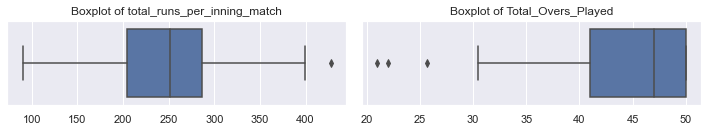

In [54]:
# --------------------------------------------------------------------------------------
sns.set_theme(style="darkgrid")

fig, axes = plt.subplots(1, 2, figsize=(10, 2))

axes = axes.flatten()

numeric_columns = ['total_runs_per_inning_match','Total_Overs_Played']

for ax, col in zip(axes, numeric_columns):
    sns.boxplot(x=df[col], ax=ax)
    ax.set_title(f'Boxplot of {col}')
    ax.set_xlabel('')
    ax.set_ylabel('')

for i in range(len(numeric_columns), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

C:\Users\nancy\AppData\Local\Temp\ipykernel_2440\1824817326.py:24: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


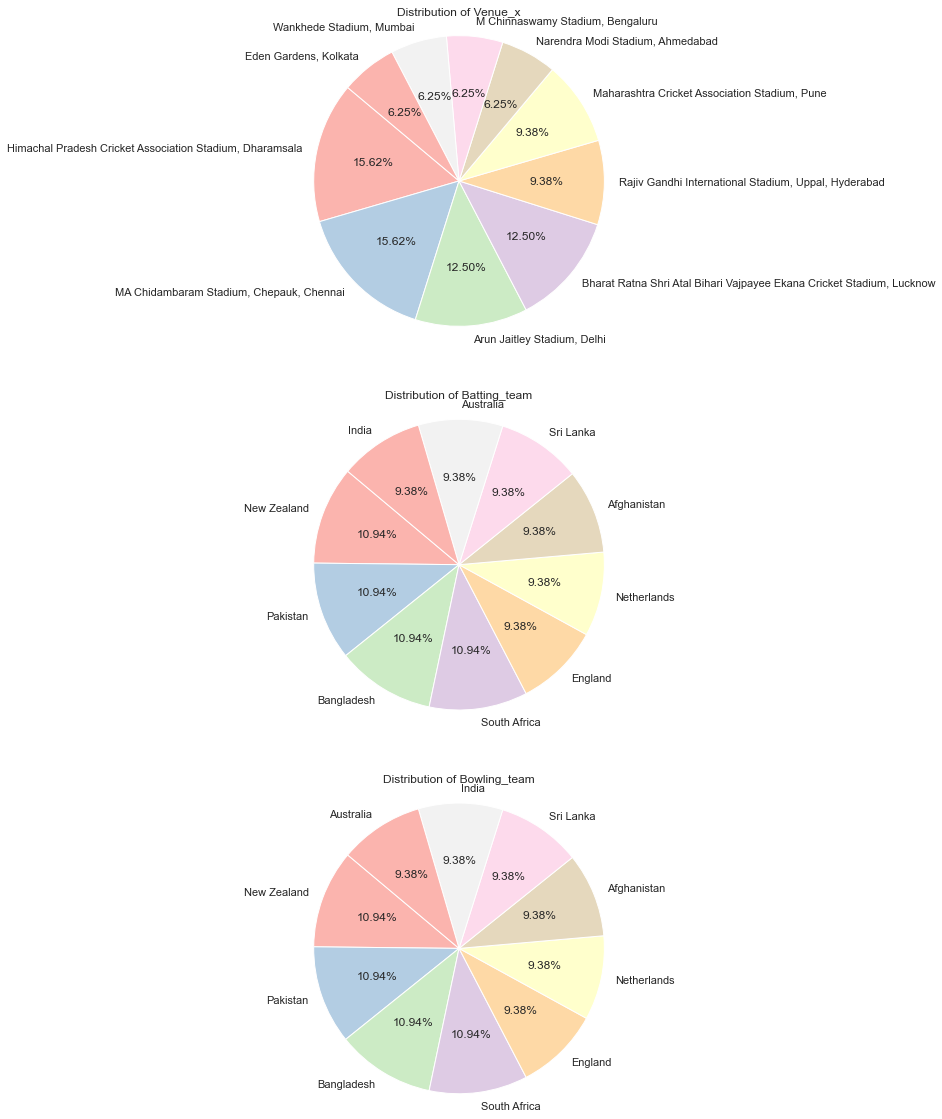

In [55]:
sns.set_theme(style="whitegrid")

fig, axes = plt.subplots(3, 1, figsize=(7, 20))

color_palette = sns.color_palette('Pastel1')

axes = axes.flatten()

for idx, feature in enumerate(categorical_columns):
    feature_counts = df[feature].value_counts()
    labels = feature_counts.index
    sizes = feature_counts.values
    colors = color_palette[:len(labels)]

    ax = axes[idx]

    ax.pie(sizes, labels=labels, colors=colors, autopct='%1.2f%%', startangle=140)
    ax.set_title(f'Distribution of {feature.capitalize()}')
    ax.axis('equal')

for i in range(len(categorical_columns), 2):
    axes[i].axis('off')

plt.tight_layout()
plt.show()

The pie chart shows that some stadiums have hosted more matches, while others have had fewer matches.

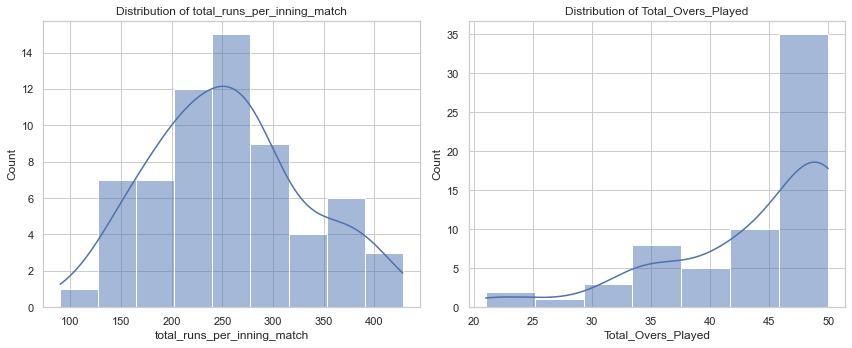

In [56]:
plt.figure(figsize=(12, 5))

# Histogram for 'total_runs_per_inning_match'
plt.subplot(1, 2, 1)
sns.histplot(df['total_runs_per_inning_match'], kde=True)
plt.title('Distribution of total_runs_per_inning_match')

# Histogram for 'Total_Overs_Played'
plt.subplot(1, 2, 2)
sns.histplot(df['Total_Overs_Played'], kde=True)
plt.title('Distribution of Total_Overs_Played')

plt.tight_layout()
plt.show()

This distribution shows the density of 'total_runs_per_inning_match' and 'Total_overs'. It shows that 'total_runs_per_inning_matcxh' is uniformly distributed. while 'Total_overs' is negative skewed which seem to be obvios and match with real world situation 

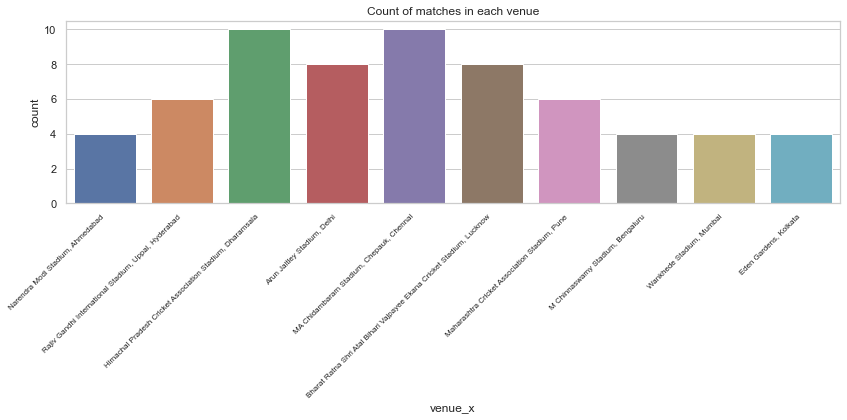

In [57]:
plt.figure(figsize=(12, 6))
sns.countplot(x='venue_x', data=df)
plt.title('Count of matches in each venue')
plt.xticks(rotation=45, ha='right', fontsize=8)
plt.tight_layout()
plt.show()

The plot illustrates that the highest number of matches were held at Himachal Pradesh Cricket Association Stadium, Dharamshala, and MA Chidambaram Stadium, Chennai.

In [58]:
mean_overs_played_per_team = df.groupby('bowling_team')['Total_Overs_Played'].mean()
print(mean_overs_played_per_team)

bowling_team
Afghanistan     43.277778
Australia       41.888889
Bangladesh      43.452381
England         43.361111
India           46.194444
Netherlands     47.055556
New Zealand     46.928571
Pakistan        44.714286
South Africa    39.928571
Sri Lanka       43.666667
Name: Total_Overs_Played, dtype: float64



This analysis provides the average number of overs played by each bowling team across all matches in the dataset.

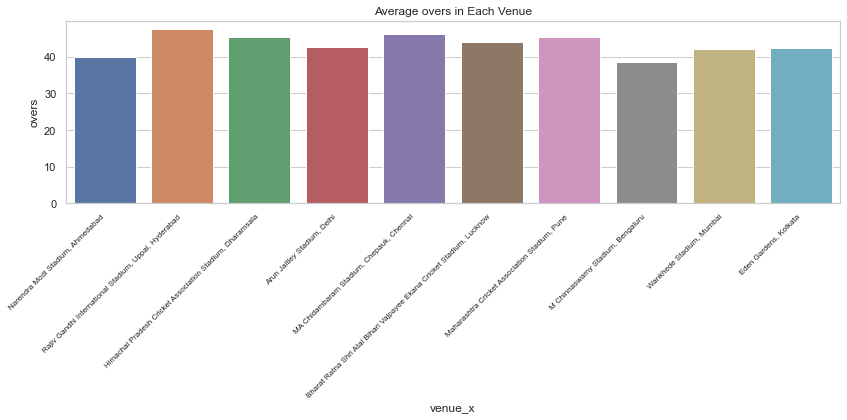

In [59]:
plt.figure(figsize=(12, 6))
sns.barplot(x='venue_x', y='Total_Overs_Played', data=df, ci=None)
plt.title('Average overs in Each Venue')
plt.ylabel('overs')
plt.xticks(rotation=45, ha='right', fontsize=8)
plt.tight_layout()
plt.show()

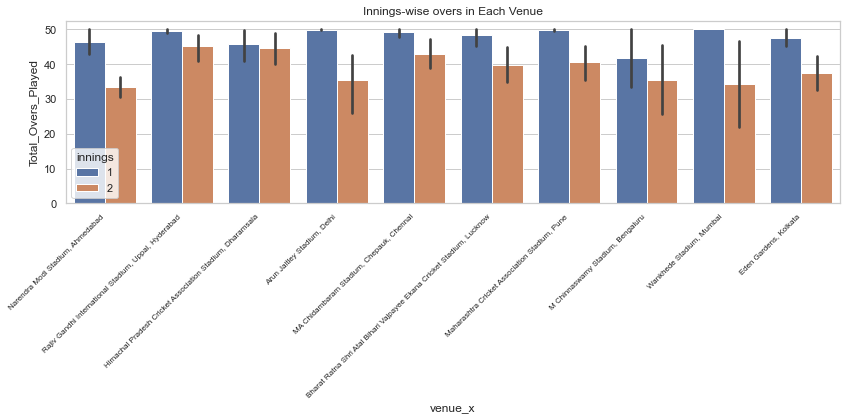

In [60]:
plt.figure(figsize=(12, 6))
sns.barplot(x='venue_x', y='Total_Overs_Played', hue='innings', data=df)
plt.title('Innings-wise overs in Each Venue')
plt.xticks(rotation=45, ha='right', fontsize=8)
plt.tight_layout()
plt.show()

This chart shows how many overs were played in different venues for each inning. It helps us understand the match dynamics and playing conditions in various cricket stadiums.

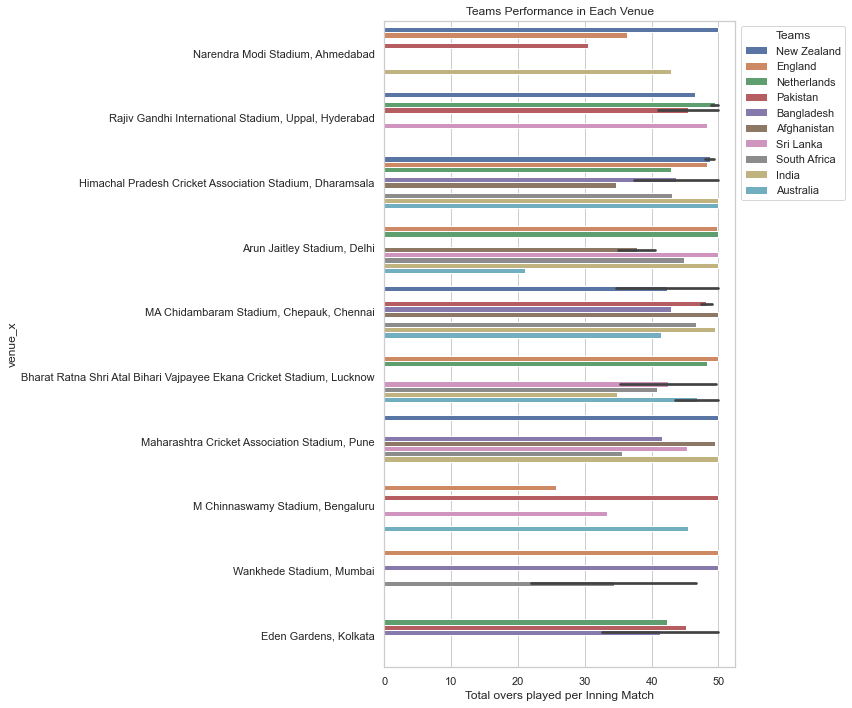

In [61]:
plt.figure(figsize=(12, 10))
sns.barplot(x='Total_Overs_Played', y='venue_x', hue='bowling_team', data=df)
plt.title('Teams Performance in Each Venue')
plt.xlabel('Total overs played per Inning Match')
plt.legend(title='Teams', bbox_to_anchor=(1, 1), loc='upper left')
plt.tight_layout()
plt.show()

This graph shows how many overs each bowling team played in different cricket venues. It helps us see how well teams perform in various locations

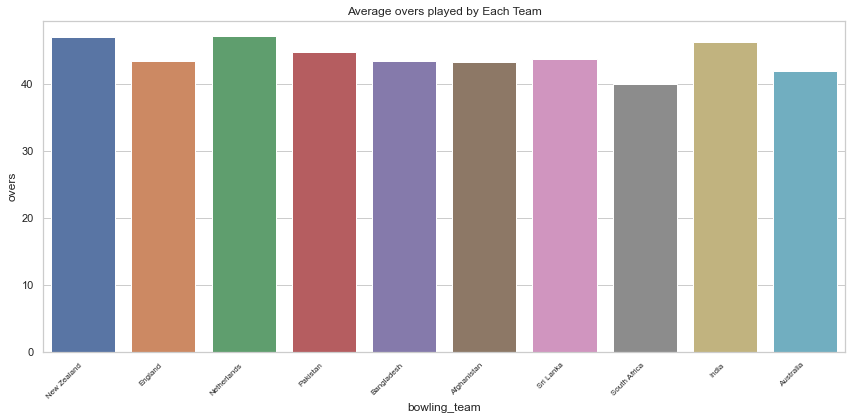

In [62]:
plt.figure(figsize=(12, 6))
sns.barplot(x='bowling_team', y='Total_Overs_Played', data=df, ci=None)
plt.title('Average overs played by Each Team')
plt.ylabel('overs')
plt.xticks(rotation=45, ha='right', fontsize=8)
plt.tight_layout()
plt.show()

In [63]:
df.isnull().sum()

venue_x                        0
innings                        0
batting_team                   0
bowling_team                   0
total_runs_per_inning_match    0
Total_Overs_Played             0
dtype: int64

In [64]:
df.nunique()

venue_x                        10
innings                         2
batting_team                   10
bowling_team                   10
total_runs_per_inning_match    55
Total_Overs_Played             38
dtype: int64

#### Label Encoding :

In [65]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [66]:
mapping = {}

for column in categorical_columns:
    df[column] = le.fit_transform(df[column])
    mapping[column] = dict(zip(le.classes_, le.transform(le.classes_)))

In [67]:
for column_name in categorical_columns:
    print(f'Mapping for column "{column_name}":')
    for key, value in mapping[column_name].items():
        print(f'{key}: {value}')
    print()


Mapping for column "venue_x":
Arun Jaitley Stadium, Delhi: 0
Bharat Ratna Shri Atal Bihari Vajpayee Ekana Cricket Stadium, Lucknow: 1
Eden Gardens, Kolkata: 2
Himachal Pradesh Cricket Association Stadium, Dharamsala: 3
M Chinnaswamy Stadium, Bengaluru: 4
MA Chidambaram Stadium, Chepauk, Chennai: 5
Maharashtra Cricket Association Stadium, Pune: 6
Narendra Modi Stadium, Ahmedabad: 7
Rajiv Gandhi International Stadium, Uppal, Hyderabad: 8
Wankhede Stadium, Mumbai: 9

Mapping for column "batting_team":
Afghanistan: 0
Australia: 1
Bangladesh: 2
England: 3
India: 4
Netherlands: 5
New Zealand: 6
Pakistan: 7
South Africa: 8
Sri Lanka: 9

Mapping for column "bowling_team":
Afghanistan: 0
Australia: 1
Bangladesh: 2
England: 3
India: 4
Netherlands: 5
New Zealand: 6
Pakistan: 7
South Africa: 8
Sri Lanka: 9



### **Model Tarining and Testing :**

In [68]:
import sys

# Add the path to your library
sys.path.append("c:\python311\lib\site-packages")

In [69]:
from sklearn.model_selection import train_test_split, cross_validate, cross_val_score, GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Models-------------------------
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from xgboost import XGBRegressor


In [70]:
X = df[['batting_team','bowling_team','venue_x','total_runs_per_inning_match','innings']]
y = df['Total_Overs_Played']

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42,test_size=0.20, shuffle=True)

In [72]:
print(X_test)

    batting_team  bowling_team  venue_x  total_runs_per_inning_match  innings
52             1             6        3                          388        1
58             9             0        6                          241        1
0              3             6        7                          282        1
44             8             2        9                          382        1
5              2             0        3                          158        2
36             8             3        9                          399        1
16             0             4        0                          272        1
12             3             2        3                          364        1
25             1             9        1                          215        2
61             7             2        2                          205        2
56             4             3        1                          229        1
9              4             1        5                         

In [73]:
size_scaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled = size_scaler.transform(X_train)
X_test_scaled = size_scaler.transform(X_test)
X_train_scaled.shape, X_test_scaled.shape

((51, 5), (13, 5))

In [74]:
model_dict = {
    'LinearRegression': {"model": LinearRegression(), "params": {}},
    'RandomForestRegressor': {"model": RandomForestRegressor(random_state=42),
                     "params": {'n_estimators': list(range(5, 50, 5)), 'max_depth': list(range(1, 10, 2))}},
    # 'XGBRegressor': {"model": XGBRegressor(), "params": {'n_estimators': list(range(10, 800, 100)), 'learning_rate': [0.001, 0.01, 0.1]}},
    'PolynomialFeatures': {"model": make_pipeline(PolynomialFeatures(), LinearRegression()),
                      "params": {'polynomialfeatures__degree': [2,3]}}
}


In [75]:
def eval_models():
    model_results = pd.DataFrame()
    model_results['Train_RMSE'] = None
    model_results['Test_RMSE'] = None
    model_results['Train_MAE'] = None
    model_results['Test_MAE'] = None
    model_results['best_params'] = None
    best_test_score = math.inf

    for model_name, reg_model in model_dict.items():
        classifier = GridSearchCV(reg_model['model'], reg_model['params'], n_jobs=20, verbose=0)
        classifier.fit(X_train_scaled, y_train)
        best_model = classifier.best_estimator_

        y_train_predicted = best_model.predict(X_train_scaled)
        train_rmse = np.sqrt(mean_squared_error(y_train, y_train_predicted))
        train_mae = mean_absolute_error(y_train, y_train_predicted)

        print(model_name, train_rmse, classifier.best_params_)

        y_predicted = best_model.predict(X_test_scaled)
        test_rmse = np.sqrt(mean_squared_error(y_test, y_predicted))
        test_mae = mean_absolute_error(y_test, y_predicted)

        if test_rmse < best_test_score:
            best_test_score = test_rmse
            best_reg_model_ours = best_model

        model_results.loc[model_name, ['Train_RMSE', 'Test_RMSE', 'Train_MAE', 'Test_MAE', 'best_params']] = [train_rmse, test_rmse, train_mae, test_mae, classifier.best_params_]

    print("Best model: ", best_reg_model_ours)
    y_predicted = best_reg_model_ours.predict(X_test_scaled)

    return model_results,best_reg_model_ours

In [76]:
model_results,best_reg_model_ours = eval_models()
model_results

LinearRegression 4.896128197935495 {}
RandomForestRegressor 2.9471541416381206 {'max_depth': 3, 'n_estimators': 35}
PolynomialFeatures 3.323795616983923 {'polynomialfeatures__degree': 2}
Best model:  LinearRegression()


,Train_RMSE,Test_RMSE,Train_MAE,Test_MAE,best_params
LinearRegression,4.896128,4.332698,3.761022,3.945144,{}
RandomForestRegressor,2.947154,4.530194,2.281807,3.149911,"{'max_depth': 3, 'n_estimators': 35}"
PolynomialFeatures,3.323796,4.365824,2.577271,3.288372,{'polynomialfeatures__degree': 2}


In [77]:
print(best_reg_model_ours)

LinearRegression()


In [78]:
y_predicted = best_reg_model_ours.predict(X_test_scaled)

In [79]:
print(y_predicted)

[56.33571365 43.84282807 48.68256255 53.7655297  36.58846208 54.9029428
 48.78272655 54.04994474 40.64586993 37.9700972  44.55657181 38.85899629
 47.24799897]


In [80]:
classifier=best_reg_model_ours
classifier.fit(X_train,y_train)

LinearRegression()

In [81]:
import pickle
pickle_out = open("../pickle_files/overs.pkl","wb")
pickle.dump(classifier, pickle_out)
pickle_out.close()